 Question 1: Practical Gradient Descent Implementation (20 marks) 
You are provided with the function f(x) = x^2 - 6x + 9. 

a) Implement a Python function that performs gradient descent to minimize this function. 
The function should take as parameters: - the initial guess x0, - learning rate alpha, - and number of iterations n. 
The function should return the list of x-values and f(x)-values for each iteration. [10 
Marks]  
                                 

In [34]:
def gradient_descent(x0, alpha, n):
    x = x0
    x_values = []
    f_values = []
    
    for iteration in range(n):
        # Compute current x and f(x)
        f_x = x**2 - 6*x + 9
        x_values.append(x)
        f_values.append(f_x)
        
        # Compute gradient
        gradient = 2 * x - 6
        
        # Update x
        x = x - alpha * gradient
    
    return x_values, f_values


b) Run your function with x0 = 2, alpha = 0.1, and n = 10. Present the output as a table 
with columns: iteration, x-value, f(x)-value.                                                          
[6 Marks]           

In [35]:
x_values, f_values = gradient_descent(2, 0.1, 10)
print(f"{'Iteration':>9} | {'x-value':>10} | {'f(x)-value':>10}")
print("-" * 35)
for i in range(len(x_values)):
    print(f"{i:>9} | {x_values[i]:>10.6f} | {f_values[i]:>10.6f}")


Iteration |    x-value | f(x)-value
-----------------------------------
        0 |   2.000000 |   1.000000
        1 |   2.200000 |   0.640000
        2 |   2.360000 |   0.409600
        3 |   2.488000 |   0.262144
        4 |   2.590400 |   0.167772
        5 |   2.672320 |   0.107374
        6 |   2.737856 |   0.068719
        7 |   2.790285 |   0.043980
        8 |   2.832228 |   0.028147
        9 |   2.865782 |   0.018014


c) Explain what would happen if the learning rate were set to 1 instead of 0.1, using 
insights from your code and outputs.                                                                     
[4 Marks] 


In [36]:
"""
A learning rate of 1 would cause the updates to be too large, potentially overshooting the minimum and leading to divergence. 
The algorithm may oscillate or diverge instead of converging.
Oscillation: The algorithm does not converge but instead oscillates between 2 and 4 indefinitely.

Reason: The learning rate is too large, causing the update steps to overshoot the minimum (which is at x = 3).

"""

'\nA learning rate of 1 would cause the updates to be too large, potentially overshooting the minimum and leading to divergence. \nThe algorithm may oscillate or diverge instead of converging.\nOscillation: The algorithm does not converge but instead oscillates between 2 and 4 indefinitely.\n\nReason: The learning rate is too large, causing the update steps to overshoot the minimum (which is at x = 3).\n\n'

Question 2: Linear Systems with Application Context (20 marks) 
A researcher is modeling a simple electrical circuit where: 

- 2I1 + 3I2 = 8 (KVL Equation 1) 
- 5I1 + 7I2 = 19 (KVL Equation 2) 

a) Formulate this system of equations as a matrix problem and solve it using NumPy in 
Python.                                                                                                                   
[6 Marks] 


In [37]:
import numpy as np

# Coefficient matrix A and constant vector b
A = np.array([[2, 3], [5, 7]])
b = np.array([8, 19])

# Solve the system
I = np.linalg.solve(A, b)

print(f"I1 = {I[0]}, I2 = {I[1]}")

I1 = 1.0, I2 = 2.0


b) Modify your code to read the coefficients and constants from a `.txt` file that has the 
system in this format: 
2 3 8 
5 7 19 
Write code to parse the file and solve the system. [8 Marks] 


In [38]:
import numpy as np

# Read the file
with open("question2.txt", "r") as file:
    lines = file.readlines()

# Parse coefficients and constants
A = []
b = []
for line in lines:
    parts = list(map(float, line.strip().split()))
    A.append(parts[:2])
    b.append(parts[2])

A = np.array(A)
b = np.array(b)

# Solve the system
I = np.linalg.solve(A, b)


print(f"I1 = {I[0]}, I2 = {I[1]}")

I1 = 1.0, I2 = 2.0


c) Explain one real-world implication if the matrix of coefficients were nearly singular. 
How would that affect the solution, and what could you do about it computationally? [6 
Marks]

In [39]:
"""
If the coefficient matrix A is nearly singular (i.e., its determinant is very close to zero), the system is ill-conditioned.

This means small errors (e.g., due to measurement noise or rounding) can lead to large changes in the solution, making the results unreliable.

Computational Impact:

Numerical methods (like np.linalg.solve()) may produce inaccurate solutions or fail due to numerical instability.

solution:
Regularization Techniques:

Use methods like Tikhonov regularization (ridge regression) to stabilize the solution.



Singular Value Decomposition (SVD):

Decompose A using SVD and discard small singular values to compute a pseudo-inverse solution.

"""

'\nIf the coefficient matrix A is nearly singular (i.e., its determinant is very close to zero), the system is ill-conditioned.\n\nThis means small errors (e.g., due to measurement noise or rounding) can lead to large changes in the solution, making the results unreliable.\n\nComputational Impact:\n\nNumerical methods (like np.linalg.solve()) may produce inaccurate solutions or fail due to numerical instability.\n\nsolution:\nRegularization Techniques:\n\nUse methods like Tikhonov regularization (ridge regression) to stabilize the solution.\n\n\n\nSingular Value Decomposition (SVD):\n\nDecompose A using SVD and discard small singular values to compute a pseudo-inverse solution.\n\n'

Question 3: Data Visualization and Interpretation (20 marks) 
Given a file data.csv with two columns: Time (s) and Temperature (°C), your task is to 
analyze a heat transfer process. 
a) Write a Python script that: - reads the data using pandas, - plots a line graph of temperature vs time, - and adds labels, title, and grid.                                                                          
[10 Marks]

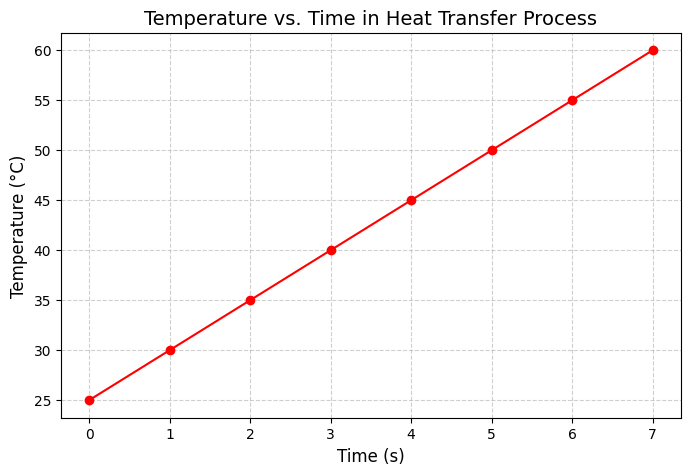

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv("data.csv")

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(data["Time (s)"], data["Temperature (°C)"], color='red', marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.title("Temperature vs. Time in Heat Transfer Process", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

b) Based on your graph, explain any two observations you can make about the heating 
process (e.g., steady state, rate of change).                                                            
[4 Marks] 

In [41]:
#Observation 1: Rate of Heating (Slope of the Curve)

#Constant Heating Rate (Linear Heating)
#The temperature increases uniformly over time, indicating a constant heat input with negligible heat loss..


#Observation 2: Continuous Temperature Rise

#a straight line means no balance between heating and cooling

c) Describe a situation in engineering where such visualization can be used to influence 
decision-making.                                                                                                    
[6 Marks]

In [42]:
#In thermal Management in Electronics Cooling

#An engineer monitors the temperature of a CPU over time under different cooling conditions (e.g., air vs. liquid cooling)
#uses cisualization in:
#Compare Cooling Efficiency: Plot temperature vs. time for both cooling methods.
#Faster temperature stabilization indicates better cooling.
#Identify Overheating Risks: If temperature rises uncontrollably, the cooling solution is inadequate.
#Optimize Fan Speed: Adjust fan speed based on the heating rate to balance noise and cooling.

#Decision-Making:
#Choosing liquid cooling if air cooling fails to prevent overheating.
#Setting fan speed thresholds based on the heating curve.

Question 4: ODE Simulation of Real System (20 marks) 

You are simulating population growth using the differential equation dy/dt = 0.5y, where 
y(0) = 100. 

a) Use Euler’s Method to approximate the population size after 4 time steps with step size 
h = 0.5. Show all computations.                                                                             
[8 Marks]

In [43]:
"""
Step 0:
t = 0.0, y = 100.0
f(t,y) = 0.5*100.0 = 50.0
y_new = 100.0 + 0.5*50.0 = 125.0

Step 1:
t = 0.5, y = 125.0
f(t,y) = 0.5*125.0 = 62.5
y_new = 125.0 + 0.5*62.5 = 156.25

Step 2:
t = 1.0, y = 156.25
f(t,y) = 0.5*156.25 = 78.125
y_new = 156.25 + 0.5*78.125 = 195.3125

Step 3:
t = 1.5, y = 195.3125
f(t,y) = 0.5*195.3125 = 97.65625
y_new = 195.3125 + 0.5*97.65625 = 244.140625
"""

'\nStep 0:\nt = 0.0, y = 100.0\nf(t,y) = 0.5*100.0 = 50.0\ny_new = 100.0 + 0.5*50.0 = 125.0\n\nStep 1:\nt = 0.5, y = 125.0\nf(t,y) = 0.5*125.0 = 62.5\ny_new = 125.0 + 0.5*62.5 = 156.25\n\nStep 2:\nt = 1.0, y = 156.25\nf(t,y) = 0.5*156.25 = 78.125\ny_new = 156.25 + 0.5*78.125 = 195.3125\n\nStep 3:\nt = 1.5, y = 195.3125\nf(t,y) = 0.5*195.3125 = 97.65625\ny_new = 195.3125 + 0.5*97.65625 = 244.140625\n'

b) Write a Python function that generalizes the Euler’s method to solve any first-order 
ODE given f(t, y), initial condition, step size, and number of steps.                   
[6 Marks] 

In [44]:
def euler_method(f, y0, t0, h, n_steps):

    t_values = [t0]
    y_values = [y0]
    
    t = t0
    y = y0
    
    for _ in range(n_steps):
        y += h * f(t, y) 
        t += h
        
        t_values.append(t)
        y_values.append(y)
    
    return t_values, y_values

# Example usage for dy/dt = 0.5y, y(0)=100, h=0.5, n_steps=4
def f(t, y):
    return 0.5 * y

t, y = euler_method(f, y0=100, t0=0, h=0.5, n_steps=4)
print("Time steps:", t)
print("Population values:", y)

Time steps: [0, 0.5, 1.0, 1.5, 2.0]
Population values: [100, 125.0, 156.25, 195.3125, 244.140625]


c) Briefly explain two limitations of using Euler’s Method for real-world systems, and 
suggest one alternative method.                                                                            
[6 Marks]

In [45]:
"""
Limitations:
1. Low Accuracy (First-Order Method)

Error accumulates quickly, especially for large step sizes.

2. Stability Issues for Stiff Equations

If the ODE has rapidly changing components (e.g., chemical reactions, fast dynamics), Euler’s method may produce unstable, oscillating, or divergent solutions.

Alternative Method: Runge-Kutta 4 (RK4)
Higher accuracy (4th-order) with better stability.

More computationally expensive but reduces error significantly.
"""

'\nLimitations:\n1. Low Accuracy (First-Order Method)\n\nError accumulates quickly, especially for large step sizes.\n\n2. Stability Issues for Stiff Equations\n\nIf the ODE has rapidly changing components (e.g., chemical reactions, fast dynamics), Euler’s method may produce unstable, oscillating, or divergent solutions.\n\nAlternative Method: Runge-Kutta 4 (RK4)\nHigher accuracy (4th-order) with better stability.\n\nMore computationally expensive but reduces error significantly.\n'